# Co 01 Timepoint Prediction with Missing Data
For Figures S11 and S12
## Import Modules

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import random

from turtles.turtles_utils import *

## Set Filepaths

In [14]:
#: Overall directory for TdT project data and analysis
tdt_dir = 'C:/Users/jonst/Box Sync/All_dNTP_data/'

#: Subdirectory for NGS run
data_dir = tdt_dir + 'Data_and_Results/All_Data_Filtered_Trimmed/Co_01_paired_simple_cut/'

#: Filename prefixes for 0 control conditions
zero_control_conds = ['Namita_23630_Mg_Col_T0_1-167005853',
                      'Namita_23630_Mg_Col_T0_2-166999859',
                      'Namita_23630_Mg_Col_T0_3-167009845']

#: Filename prefixes for 1 control conditions
one_control_conds = ['Namita_23630_Cobalt_Col_T0_1-167010847',
                     'Namita_23630_Cobalt_Col_T0_2-166993853',
                     'Namita_23630_Cobalt_Col_T0_3-166999858']

#: suffix of R1 fastq file to read in each directory
filename_end = 'trimmed.fq'

#: Directory to save generated figures in - it gets created if not present already
figure_dir = tdt_dir + 'Data_and_Results/Cobalt_01/Co_01_Paired_Simple_Cut_Final/'
os.makedirs(os.path.dirname(figure_dir), exist_ok=True)

p_discards = [0.9, 0.99, 0.999, 0.9999]
n_trials = [10, 100, 100, 100]

## Load Sequences

In [4]:
seqs_dict = read_seqs(data_dir, filename_end=filename_end, cutoff=5.8)

Loading Namita_23630_Cobalt_Col_10_min_1-166999856
Read 543724 sequences...

Loading Namita_23630_Cobalt_Col_10_min_2-167010846
Read 713786 sequences...

Loading Namita_23630_Cobalt_Col_10_min_3-167008844
Read 781199 sequences...

Loading Namita_23630_Cobalt_Col_20_min_1-167006850
Read 634854 sequences...

Loading Namita_23630_Cobalt_Col_20_min_2-166996865
Read 618589 sequences...

Loading Namita_23630_Cobalt_Col_20_min_3-166999857
Read 623927 sequences...

Loading Namita_23630_Cobalt_Col_45_min_1-166996866
Read 620758 sequences...

Loading Namita_23630_Cobalt_Col_45_min_2-167009844
Read 578837 sequences...

Loading Namita_23630_Cobalt_Col_45_min_3-166992854
Read 556232 sequences...

Loading Namita_23630_Cobalt_Col_T0_1-167010847
Read 632005 sequences...

Loading Namita_23630_Cobalt_Col_T0_2-166993853
Read 517898 sequences...

Loading Namita_23630_Cobalt_Col_T0_3-166999858
Read 613767 sequences...

Loading Namita_23630_Mg_Col_T0_1-167005853
Read 611651 sequences...

Loading Namita_2363

## Randomly Remove Sequences n Times for each Percent Data Removed

In [18]:
seqs_dict_rm = {}

for p_discard, n_trial in zip(p_discards, n_trials):
    seqs_dict_rm[p_discard] = {}

    for n in range(n_trial):
        
        seqs_dict_rm[p_discard][n + 1] = {}

        for cond in seqs_dict:
            seqs_left = random.sample(seqs_dict[cond], int((1 - p_discard) * len(seqs_dict[cond])))
            seqs_dict_rm[p_discard][n + 1][cond] = seqs_left

## Choose Legend Labels for Plotting
### Condition Labels

In [28]:
condition_dict = {}
conditions = seqs_dict.keys()
for condition in conditions:
    cond = condition[:10]
    if 'Cobalt_Col_T0' in condition:
        condition_dict[condition] = '1 Control'
    elif 'Cobalt_Col_10_min' in condition:
        condition_dict[condition] = '01 at 10 min'
    elif 'Cobalt_Col_20_min' in condition:
        condition_dict[condition] = '01 at 20 min'
    elif 'Cobalt_Col_45_min' in condition:
        condition_dict[condition] = '01 at 45 min'
    elif 'Mg_Col_T0' in condition:
        condition_dict[condition] = '0 Control'
    elif 'NoTdT' in condition:
        condition_dict[condition] = 'No TdT Control'
    else:
        print(condition, 'not recognized.')

### Replicate Labels

In [29]:
rep_dict = {}
for condition in conditions:
    if 'NoTdT' in condition:
        rep_dict[condition] = 1
    else:
        rep_dict[condition] = condition[-11]

## Bin Sequences, Calculate dNTP Frequency, and Transform into Aitchison Space
Note: Binning can take a while.

In [34]:
counts_dict = {}

for p_discard, n_trial in zip(p_discards, n_trials):
    
    counts_dict[p_discard] = {}
    
    for n in range(n_trial):

        counts_dict[p_discard][n + 1] = get_norm_len_base_counts(seqs_dict_rm[p_discard][n + 1], num_bins=1000)

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_NoTdT_Col-166993854 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_NoTdT_Col-166993854 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_NoTdT_Col-166993854 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_NoTdT_Col-166993854 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_NoTdT_Col-166993854 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_NoTdT_Col-166993854 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_NoTdT_Col-166993854 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_NoTdT_Col-166993854 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_NoTdT_Col-166993854 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_NoTdT_Col-166993854 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-1670058

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_NoTdT_Col-166993854 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 p

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_NoTdT_Col-166993854 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_NoTdT_Col-166993854 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 pro

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_NoTdT_Col-166993854 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_NoTdT_Col-166993854 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_NoTdT_Col-166993854 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_NoTdT_Col-166993854 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 p

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_NoTdT_Col-166993854 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_NoTdT_Col-166993854 processed



Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_NoTdT_Col-166993854 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_NoTdT_Col-166993854 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-16701

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_NoTdT_Col-166993854 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_NoTdT_Col-166993854 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_NoTdT_Col-166993854 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-1670058

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_NoTdT_Col-166993854 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-1670058

Namita_23630_NoTdT_Col-166993854 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_NoTdT_Col-166993854 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_NoTdT_Col-166993854 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_NoTdT_Col-166993854 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 p

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_NoTdT_Col-166993854 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_NoTdT_Col-166993854 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_NoTdT_Col-166993854 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-1670058

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_NoTdT_Col-166993854 processed

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_

In [35]:
pcts_dict = {p_discard: {} for p_discard in p_discards}
clr_data = {p_discard: {} for p_discard in p_discards}

for p_discard, n_trial in zip(p_discards, n_trials):

    for n in range(n_trial):

        counts = counts_dict[p_discard][n + 1]
        pcts = calc_norm_len_base_pcts(counts)
        clr_vals = calc_aitchison_distance(pcts)
        
        pcts_dict[p_discard][n + 1] = pcts
        clr_data[p_discard][n + 1] = clr_vals

C:\Users\jonst\Box Sync\All_dNTP_Data\turtles\turtles_utils.py:1074: RuntimeWarning: divide by zero encountered in log
  lmat = np.log(mat)
C:\Users\jonst\Box Sync\All_dNTP_Data\turtles\turtles_utils.py:1076: RuntimeWarning: invalid value encountered in subtract
  return (lmat - gm).squeeze()
C:\Users\jonst\Box Sync\All_dNTP_Data\turtles\turtles_utils.py:260: RuntimeWarning: invalid value encountered in true_divide
  pcts_dict[condition][base] = np.divide(counts, total_counts)
C:\Users\jonst\Box Sync\All_dNTP_Data\turtles\turtles_utils.py:1027: RuntimeWarning: invalid value encountered in less
  if np.any(mat < 0):


## Calculate and Plot Timepoint Results
### Convert Data into Long-Form pandas DataFrame

In [65]:
data_dfs = {p_discard: {} for p_discard in p_discards}

num_bins = 1000

for p_discard, n_trial in zip(p_discards, n_trials):
    
    for n in range(n_trial):
        
        data_df = generate_aitch_df(pcts_dict[p_discard][n + 1], clr_data[p_discard][n + 1],
                                    condition_dict, rep_dict, zero_control_conds,
                                    one_control_conds)

        data_df = calc_signal(data_df, zero_control_conds, one_control_conds)

        data_df['Trial'] = [n + 1] * len(data_df)
        data_df['Num Trials'] = [n_trial] * len(data_df)
        data_df['Percent Data'] = [1 - p_discard] * len(data_df)
        
        num_seqs_col = []
        
        for condition in data_df.Directory.unique():
            
            num_seqs = len(seqs_dict_rm[p_discard][n + 1][condition])
            num_seqs_col += [num_seqs] * num_bins

        data_df['Num Seqs'] = num_seqs_col
        
        data_dfs[p_discard][n + 1] = data_df

In [73]:
data_dfs[0.9999][9].head()

,Directory,Condition,Replicate,Bin Number,Aitch Dist (from 0),Aitch Dist (from 1),A % Aitch,C % Aitch,G % Aitch,T % Aitch,...,A %,C %,G %,T %,Aitch Fraction,Signal,Trial,Num Trials,Percent Data,Num Seqs
0,Namita_23630_Cobalt_Col_10_min_1-166999856,01 at 10 min,1,1,0.642663,1.211586,-0.421032,0.030953,0.965262,-0.575183,...,0.134615,0.211538,0.538462,0.115385,0.346589,0.227838,9,100,0.0001,52
1,Namita_23630_Cobalt_Col_10_min_1-166999856,01 at 10 min,1,2,0.642663,1.211586,-0.421032,0.030953,0.965262,-0.575183,...,0.134615,0.211538,0.538462,0.115385,0.346589,0.227838,9,100,0.0001,52
2,Namita_23630_Cobalt_Col_10_min_1-166999856,01 at 10 min,1,3,0.642663,1.211586,-0.421032,0.030953,0.965262,-0.575183,...,0.134615,0.211538,0.538462,0.115385,0.346589,0.227838,9,100,0.0001,52
3,Namita_23630_Cobalt_Col_10_min_1-166999856,01 at 10 min,1,4,0.642663,1.211586,-0.421032,0.030953,0.965262,-0.575183,...,0.134615,0.211538,0.538462,0.115385,0.346589,0.227838,9,100,0.0001,52
4,Namita_23630_Cobalt_Col_10_min_1-166999856,01 at 10 min,1,5,0.642663,1.211586,-0.421032,0.030953,0.965262,-0.575183,...,0.134615,0.211538,0.538462,0.115385,0.346589,0.227838,9,100,0.0001,52


### Calculate Switch Times

In [81]:
averages_dict = {p_discard: {} for p_discard in p_discards}
len_dists_dict = {p_discard: {} for p_discard in p_discards}

for p_discard, n_trial in zip(p_discards, n_trials):
    
    for n in range(n_trial):
        
        len_dists = get_length_dists(seqs_dict_rm[p_discard][n + 1])

        averages = parse_fastq_lengths(len_dists, expt_time=60)
        averages = calc_switch_bins(averages, data_dfs[p_discard][n + 1])
        averages = calc_switch_times(averages, num_bins=1000,
                                     start_control_conds=zero_control_conds,
                                     end_control_conds=one_control_conds, t_expt=60)
        
        len_dists_dict[p_discard][n + 1] = len_dists
        averages_dict[p_discard][n + 1] = averages

### Calculate average switch time and error for each p_discard

In [107]:
switch_time_col = []
actual_time_col = []
trial_col = []
p_discard_col = []
num_seqs_col = []


means10 = {p_discard: [] for p_discard in p_discards}
means20 = {p_discard: [] for p_discard in p_discards}
means45 = {p_discard: [] for p_discard in p_discards}

for p_discard, n_trial in zip(p_discards, n_trials):
    
    for n in range(n_trial):

        averages = averages_dict[p_discard][n + 1]

        means10[p_discard] += [averages['Switch Time'][0:3].mean()]
        means20[p_discard] += [averages['Switch Time'][3:6].mean()]
        means45[p_discard] += [averages['Switch Time'][6:9].mean()]

    switch_time_col += means10[p_discard]
    actual_time_col += [10] * n_trial

    switch_time_col += means20[p_discard]
    actual_time_col += [20] * n_trial

    switch_time_col += means45[p_discard]
    actual_time_col += [45] * n_trial
    
    trial_col += [n + 1 for n in list(range(n_trial)) * 3]  # 3 conditions
    p_discard_col += [p_discard] * n_trial * 3  # 3 conditions

In [210]:
summary_df = pd.DataFrame()

summary_df['Percent Data Discarded'] = p_discard_col
summary_df['Percent Data Used'] = 1 - summary_df['Percent Data Discarded']
summary_df['Trial'] = trial_col
summary_df['Actual Time'] = actual_time_col
summary_df['Predicted Time'] = switch_time_col

jitter = [random.uniform(.8, 1.25) for _ in range(len(summary_df))]
summary_df['Percent Data Used (Jitter)'] = summary_df['Percent Data Used'] * jitter

summary_df['Percent Error'] = abs(summary_df['Actual Time'] - summary_df['Predicted Time']) \
                              / summary_df['Actual Time'] * 100

summary_df.head()

,Percent Data Discarded,Percent Data Used,Trial,Actual Time,Predicted Time,Percent Data Used (Jitter),Percent Error
0,0.9,0.1,1,10,9.526353,0.107909,4.736469
1,0.9,0.1,2,10,9.768768,0.084019,2.312316
2,0.9,0.1,3,10,9.820433,0.103003,1.795666
3,0.9,0.1,4,10,9.911417,0.091555,0.885833
4,0.9,0.1,5,10,9.740594,0.124820,2.594061


### Set Seaborn Style

In [211]:
sns.set(style='white', font='times-new-roman', font_scale=2, rc={'lines.linewidth': 5})
mpl.rc('font',family='Times New Roman')

### Plot

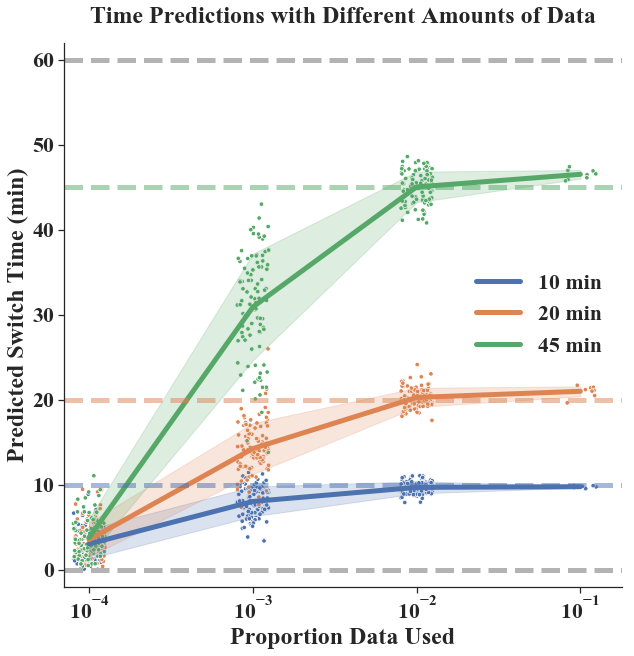

In [216]:
fig, ax = plt.subplots(figsize=(10,10))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelleft=True, left=True, bottom=True)

ax = sns.scatterplot(x='Percent Data Used (Jitter)', y='Predicted Time', hue='Actual Time',
                     data=summary_df, s=20, legend=False,
                     palette=sns.color_palette()[0:3])

ax = sns.lineplot(x='Percent Data Used', y='Predicted Time', hue='Actual Time', ci="sd",
                  data=summary_df, legend='full', palette=sns.color_palette()[0:3])

ax.legend(['10 min', '20 min', '45 min'], frameon=False)

ax.set_ylim(-2, 62)

ax.axhline(0, color='.7', ls='--')
ax.axhline(60, color='.7', ls='--')

ax.axhline(10, color=sns.color_palette()[0], alpha=.5, ls='--')
ax.axhline(20, color=sns.color_palette()[1], alpha=.5, ls='--')
ax.axhline(45, color=sns.color_palette()[2], alpha=.5, ls='--')

ax.set(xscale='log')

ax.set_xlabel('Proportion Data Used')
ax.set_ylabel('Predicted Switch Time (min)')
ax.set_title('Time Predictions with Different Amounts of Data', pad=20)

fig.savefig(figure_dir + 'Time_Prediction')

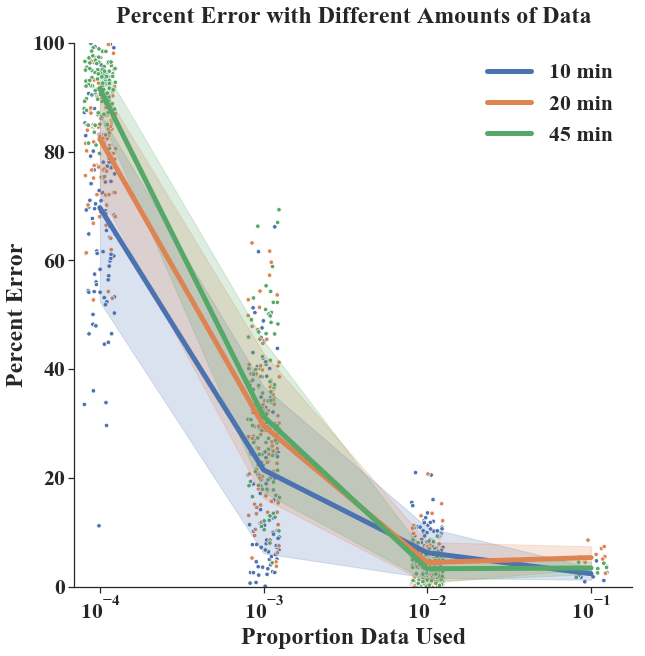

In [215]:
fig, ax = plt.subplots(figsize=(10,10))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelleft=True, left=True, bottom=True)

ax = sns.scatterplot(x='Percent Data Used (Jitter)', y='Percent Error', hue='Actual Time',
                     data=summary_df, s=20, legend=False,
                     palette=sns.color_palette()[0:3])

ax = sns.lineplot(x='Percent Data Used', y='Percent Error', hue='Actual Time', ci='sd',
                  data=summary_df, legend='full', palette=sns.color_palette()[0:3])

ax.legend(['10 min', '20 min', '45 min'], frameon=False)

ax.set(xscale='log')

ax.set_ylim(0, 100)

ax.set_xlabel('Proportion Data Used')
ax.set_ylabel('Percent Error')

ax.set_title('Percent Error with Different Amounts of Data', pad=20)
fig.savefig(figure_dir + 'Percent_Error')

## Plot Examples with Missing Data
Just use 1st trial of each p_discard

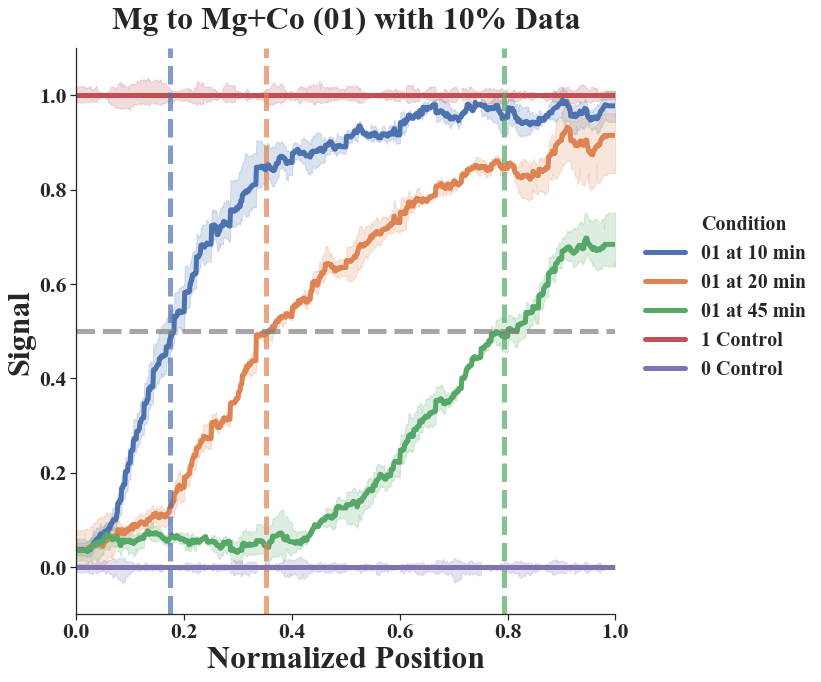

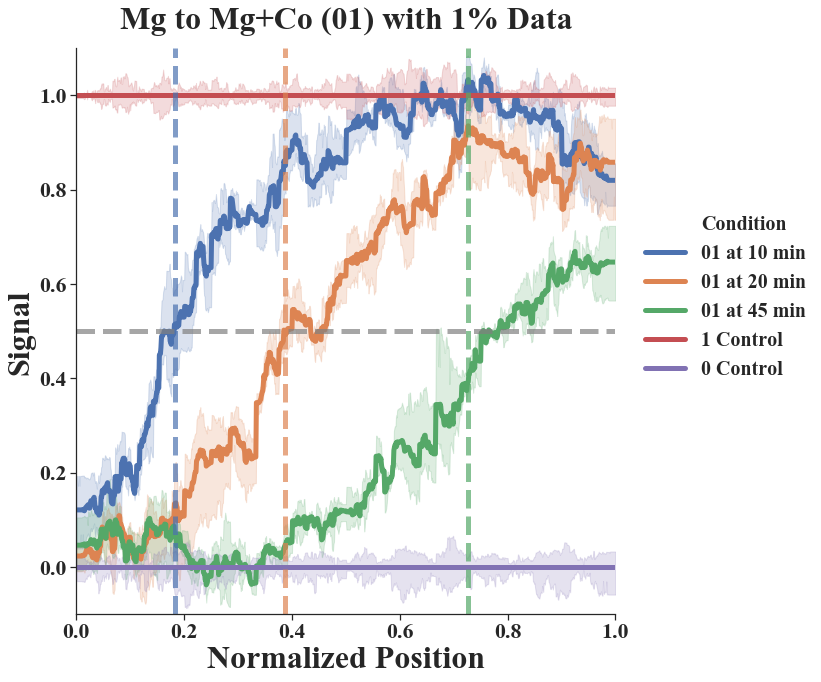

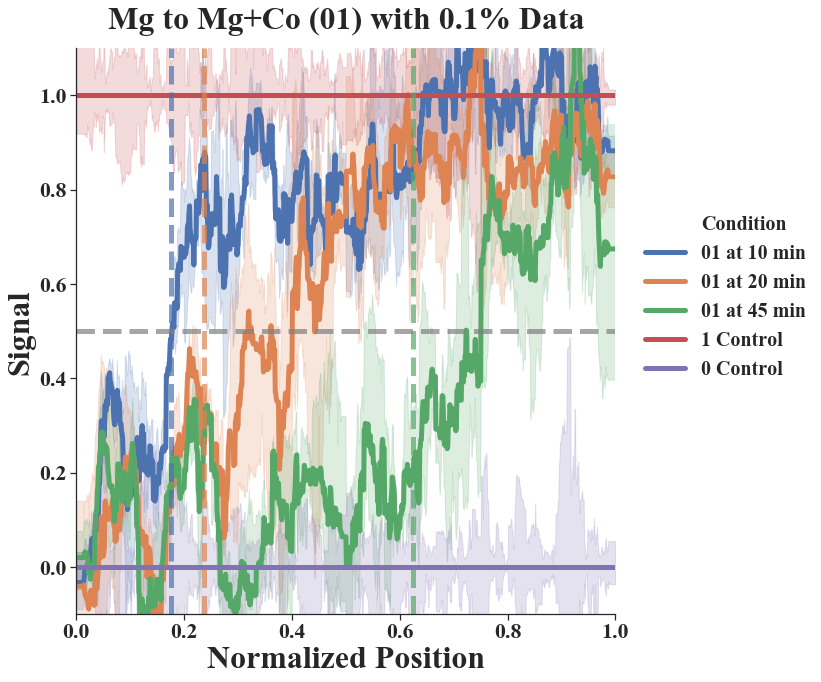

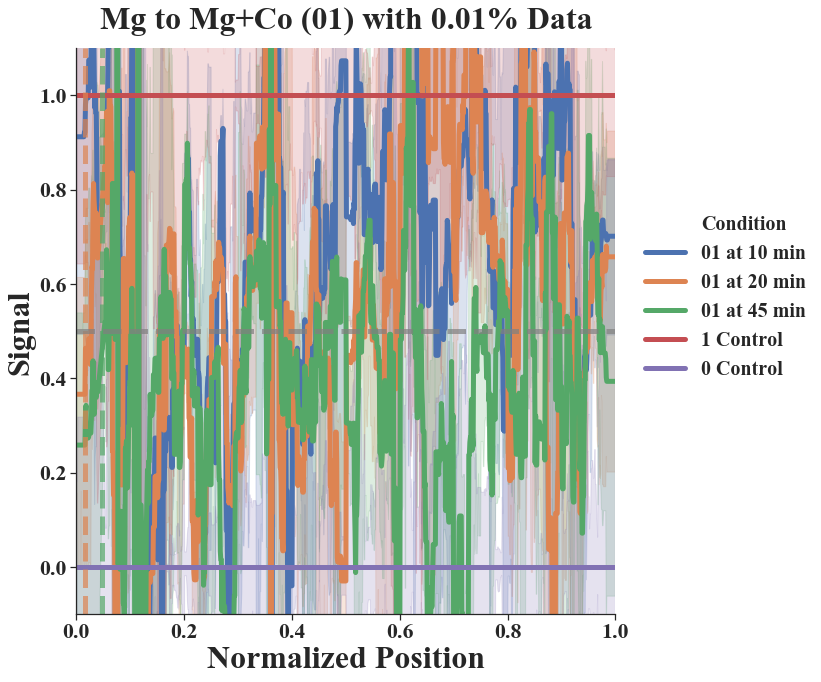

In [209]:
n_bins = 1000

data_kept_pcts = {0.9: '10', 0.99: '1', 0.999: '0.1', 0.9999: '0.01'}

for p_discard in p_discards:
    sub_data = data_dfs[p_discard][1]
    sub_data = sub_data[sub_data.Condition != 'No TdT Control']
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,10))

    sns.lineplot(x='Bin Number', y='Signal', hue='Condition',
                 data=sub_data, ax=ax)

    ax.legend(loc=(1.04, 0.4), fontsize=20, frameon=False)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(labelleft=True, left=True, bottom=True)

    ax.set_xlim(0, n_bins)
    ax.set_xticks(range(0, n_bins + 1, int(n_bins / 5)))
    ax.set_xticklabels(np.arange(0, 1.1, 0.2, dtype=np.float32))
    ax.set_xlabel('Normalized Position', fontsize=32)
    ax.set_ylabel('Signal', fontsize=32)
    ax.set_ylim(-0.1, 1.1)
    ax.set_title('Mg to Mg+Co (01) with {}% Data'.format(data_kept_pcts[p_discard]),
                 fontsize=32, pad=20)

    # Add switch bases
    averages = averages_dict[p_discard][1]
    ax.axvline(averages.iloc[0:3, 4].mean(), color=sns.color_palette()[0], alpha=.7, ls='--')
    ax.axvline(averages.iloc[3:6, 4].mean(), color=sns.color_palette()[1], alpha=.7, ls='--')
    ax.axvline(averages.iloc[6:9, 4].mean(), color=sns.color_palette()[2], alpha=.7, ls='--')

    ax.axhline(0.5, color='0.5', alpha=0.7, ls='--')

    plt.tight_layout()
    fig.savefig(figure_dir + '01_Timepoint_' + str(p_discard) + '_Trial1_removed.png')
    plt.show()